NAME - OM CHANDRA

UID - 2021700014

BATCH - L

EXPT - 1

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv("/content/US  E-commerce records 2020.csv", encoding='ISO-8859-1')

In [157]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [158]:
df.shape

(3312, 19)

In [159]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

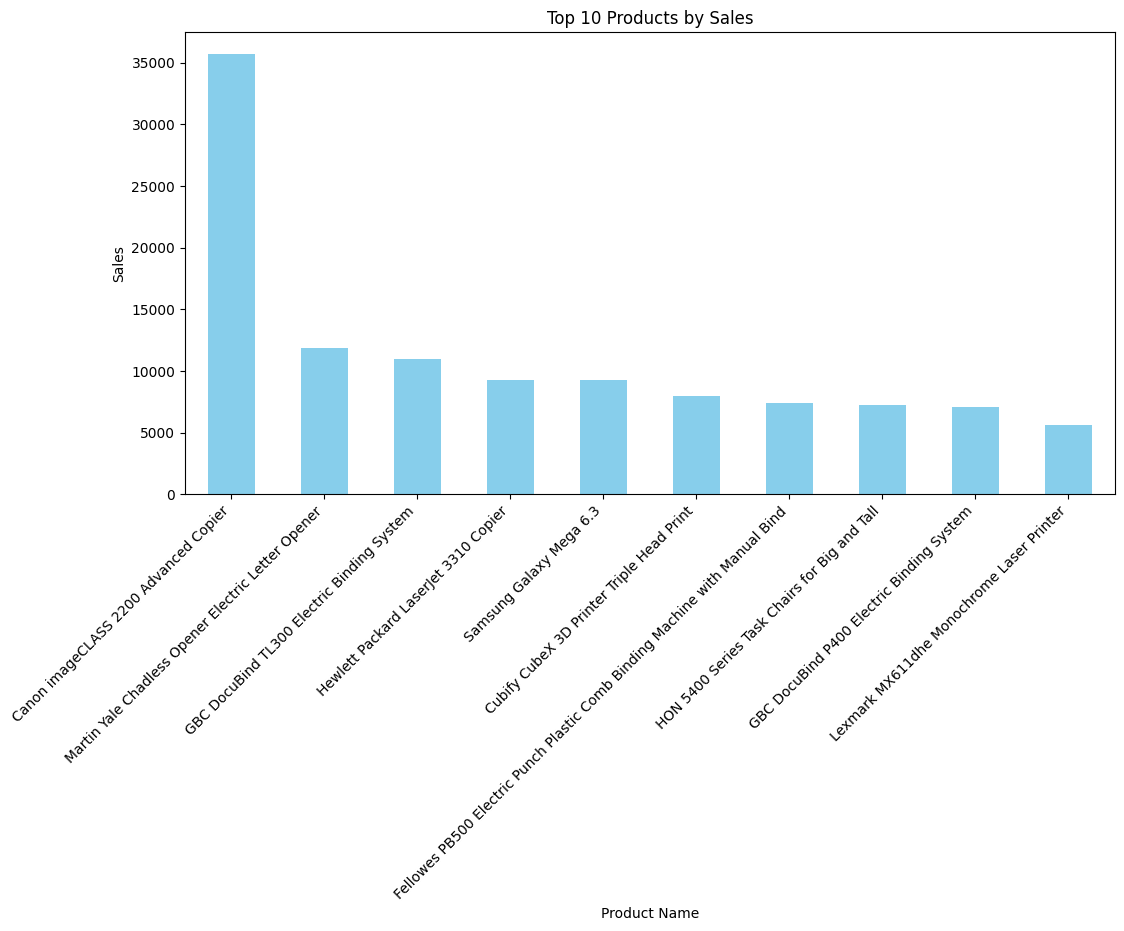

In [160]:
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()

**1.A Bar Chart: Top 10 Products by Sales**

**Questions Answered:**

1.)Which are the top 10 products in terms of sales?

2.)How do sales compare among these top products?

**Observations:**

1.)This chart shows the top 10 products with the highest total sales.

2.)It helps identify which products contribute most to overall sales.Here,Canon imageCLASS 2200 Advanced Copier has significantly High Sales as compared to other products.


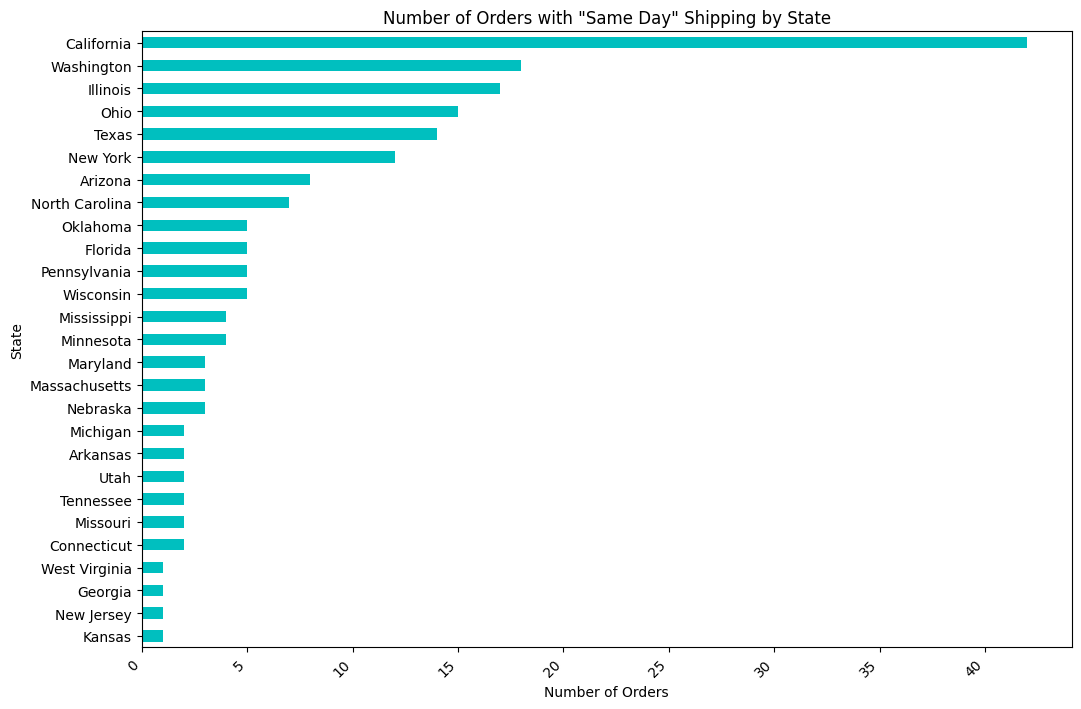

In [161]:
same_day_orders = df[df['Ship Mode'] == 'Same Day']

state_orders = same_day_orders['State'].value_counts(ascending = False).sort_values()

plt.figure(figsize=(12, 8))
state_orders.plot(kind='barh', color='c')
plt.title('Number of Orders with "Same Day" Shipping by State')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.show()

**1.B Horizontal Bar Chart: Number of Orders with "Same Day" Shipping by State**

**Questions Answered:**

1.)Which states have the highest number of same-day shipping orders?

2.)If company has to open a new warehouse,then in which state it should open so that the same day shipping orders become easy and Profit increases?

3.)How does the volume of same-day orders vary by state?

**Observations:**

1.) This chart displays the number of same-day shipping orders across different states.

2.)It allows comparison of order volume for same-day shipping by state.Here we can see that we get maximum same day shipping orders from States like California,Washington and Illinis so opening a new warehouse in one of these states would be profitable for the Company.


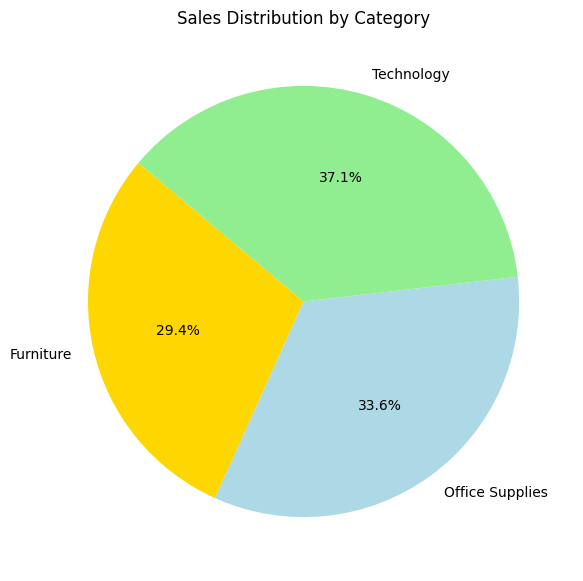

In [162]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(7, 7))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()


**2.A Pie Chart: Sales Distribution by Category**

**Questions Answered:**

1.)What percentage of total sales does each category represent?

2.)How is sales distribution across categories?

**Observations:**

1.)This chart displays the proportion of total sales contributed by each product category.

2.)Here we can see that all Product categories contribute almost equally to the Sales but the Technology category contributes slightly more to the Sales.



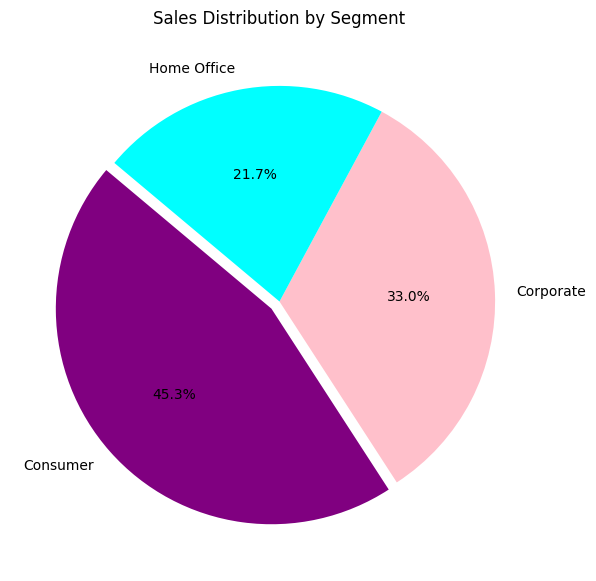

In [163]:
segment_sales = df.groupby('Segment')['Sales'].sum()

explode = [0.05 if i == segment_sales.idxmax() else 0 for i in segment_sales.index]

plt.figure(figsize=(7, 7))
segment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['purple', 'pink', 'cyan'], explode=explode)
plt.title('Sales Distribution by Segment')
plt.ylabel('')
plt.show()

**2.B Pie Chart: Sales Distribution by Segment (with Exploded Slice)**

**Questions Answered:**

1.)What is the sales distribution across different segments?

2.)Which segment contributes the most to sales so that the Company can manages Discounts and Schemes accordingly?

**Observations:**

1.)This chart provides insight into how sales are distributed among different market segments.

2.)Consumer Segment contributes the most to the Sales so the Company should focus on storing more products of Consumer Segment and managing its inventory effectively.

3.)Home Office Segment contributes the least to the Sales so the Company should focus on discounts and schemes to increase the Sales of Home Office Segment.


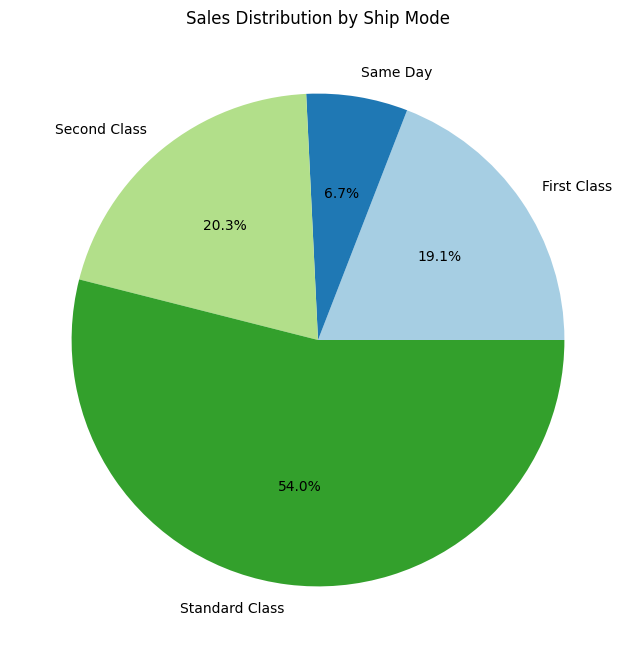

In [164]:
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()

plt.figure(figsize=(8, 8))
ship_mode_sales.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(ship_mode_sales))))
plt.title('Sales Distribution by Ship Mode')
plt.ylabel('')
plt.show()


**2.C Pie Chart: Sales Distribution by Ship Mode**

**Questions Answered:**

1.)How are sales distributed among different shipping modes?

2.)Which shipping mode has the largest share of total sales?

**Observations:**

1.)This chart helps identify which shipping methods are most common.

2.)We can see 54% orders have Standard Shipping and approx 7% orders have Same-day Shipping.This numbers help the Company in managing the Inventory.


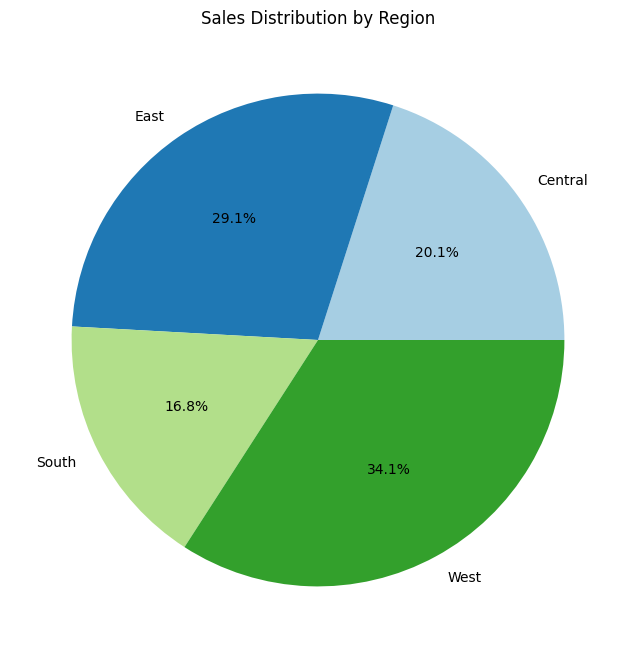

In [165]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(region_sales))))
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


**2.D Pie Chart: Sales Distribution by Region**

**Questions Answered:**

1.)What is the sales distribution across various regions?

2.)Which region generates the most sales?

**Observations:**

1.)Highlights the share of total sales for each region.

2.)Here we can see that the people from Eastern and Western part of USA order more than the people from Central and Southern part of USA.So to increase the Sales in Central and Southern part,Company can launch new products specific to people from Central and Southern part of USA.


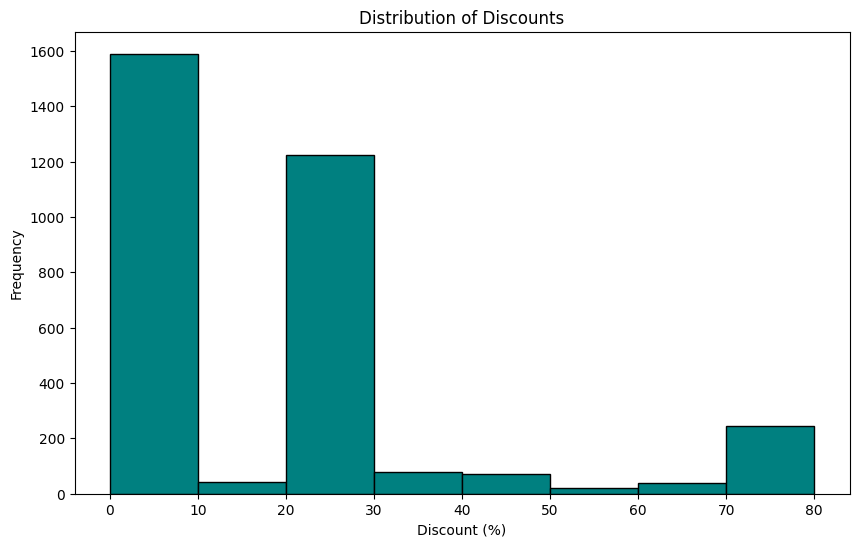

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(df['Discount'] * 100, bins=8, color='teal', edgecolor='black')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

**3.A Histogram: Distribution of Discounts**

**Questions Answered:**

1.)What is the distribution of discount percentages?


2.)How frequently are different discount levels applied?

**Observations:**

1.)Helps identify the common discount levels and their frequency.

2.)People tend to apply 0-10%, 20-30% and 70-80% discounts depending on the discounts provided.



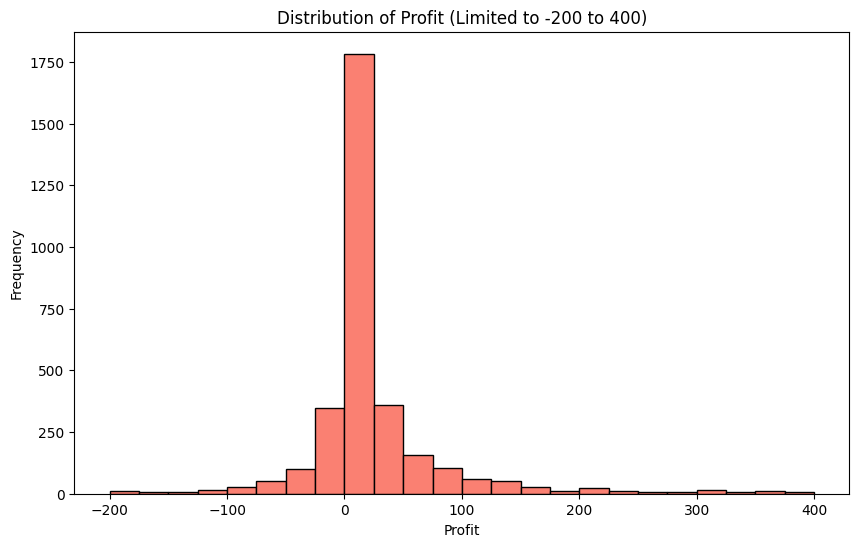

In [167]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=24, range=(-200, 400), color='salmon', edgecolor='black')
plt.title('Distribution of Profit (Limited to -200 to 400)')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

**3.B Histogram: Distribution of Profit (Limited to -200 to 400)**

**Questions Answered:**

1.)How is profit distributed within the specified range?

2.)What profit levels are most common and average profit?

**Observations:**

1.)This chart provides insight into the spread and frequency of profit margins.

2.)Company mostly earns a profit of 25-50\$ on a Product.

3.)There are some Products which give profit upto 300-400\$ and some products which give a loss of 50-100\$ dollaltough they have a less frequency.The loss behind a product is mostly because of high Discounts on that Product so Company need to revise the profit margin and schemes.


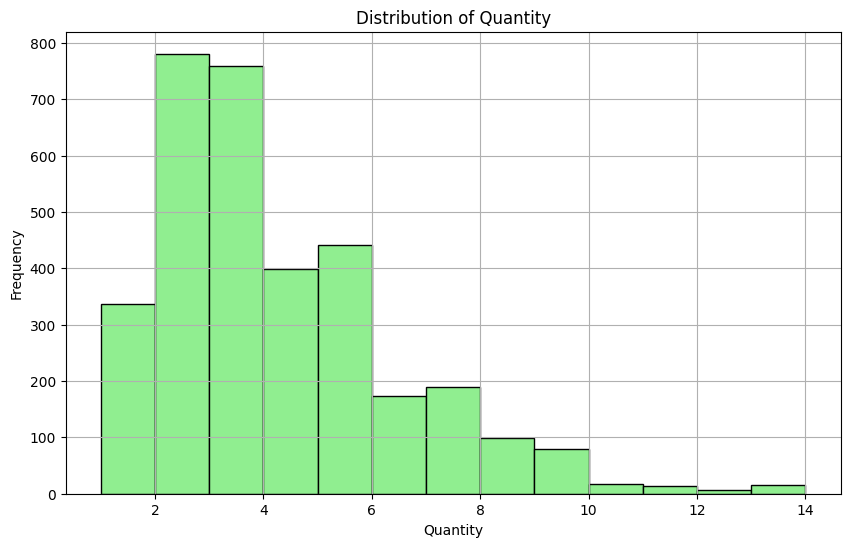

In [168]:
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=13, color='lightgreen', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**3.C Histogram: Distribution of Quantity**

**Questions Answered:**

1.)What is the distribution of quantities sold?

2.)Which quantity ranges are most common?

**Observations:**

1.)This chart helps understand the common quantity ranges for products sold.

2.)From the above chart we can see that people tend to buy a product in quantiy of 2-4 so we can plan the rates,discounts and offers according to this Customer Nature.




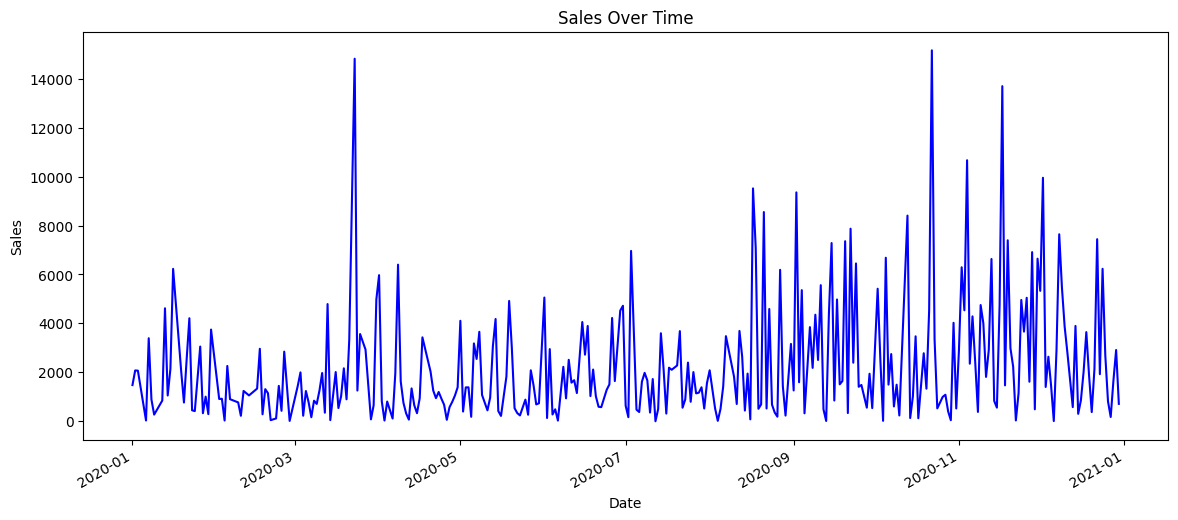

In [169]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')

daily_sales = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(14, 6))
daily_sales.plot(kind='line', color='blue')
plt.title('Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()


**4.A Line Chart: Sales Over Time**

**Questions Answered:**

1.)How have sales trends changed over time?

2.)Are there any noticeable patterns or trends in daily sales?

**Observations:**

1.)This chart Illustrates how sales have changed over time and shows trends and fluctuations in sales on a daily basis.

2.)From the above chart we can see that the Sales of the Company spikes in April month because of the Easter Festival and in November and December month beacause of Christmas as people tend to do more shopping during festivals

3.)This data helps the Company in managing the workstaff, inventory,advertisements and offers accordingly.


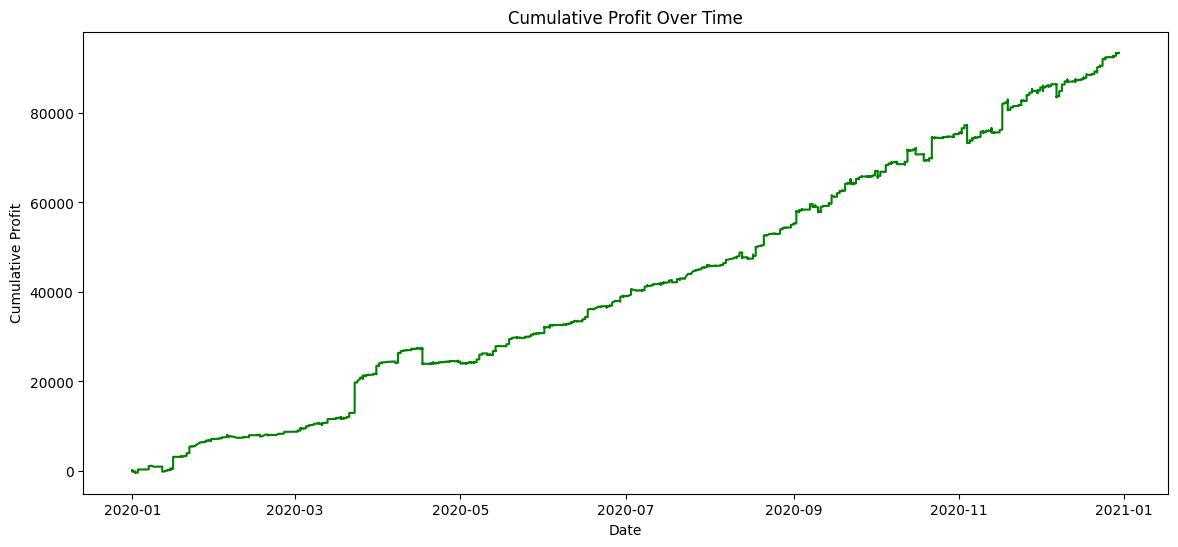

In [170]:
df = df.sort_values(by='Order Date')
df['Cumulative Profit'] = df['Profit'].cumsum()

plt.figure(figsize=(14, 6))
plt.plot(df['Order Date'], df['Cumulative Profit'], color='green')
plt.title('Cumulative Profit Over Time')
plt.ylabel('Cumulative Profit')
plt.xlabel('Date')
plt.show()


**4.B Line Chart: Cumulative Profit Over Time**

**Questions Answered:**

1.)How does cumulative profit progress over time?

2.)Are there any significant changes or trends in cumulative profit?

**Observations:**

1.) This chart displays the cumulative profit over time, showing overall profit growth and helps track how profit accumulates day by day.

2.) Similar to Sales we can see a significant increase in Profit in months of April,November and December because of festivals.



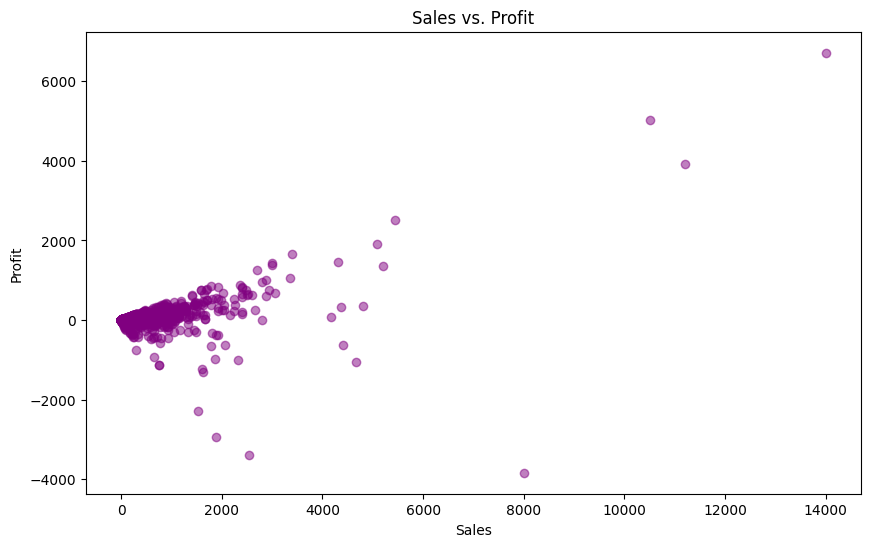

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='purple', alpha=0.5)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


**5. Scatter Plot: Sales vs. Profit**

**Questions Answered:**

1.) Is there a correlation between sales and profit?

2.)How do different sales levels impact profit?

**Observations:**

1.)This chart shows the relationship between sales and profit for each transaction and helps identify any correlation between sales and profit.

2.)We can see a direct relationship between Sales and Profit as Sales increases Profit increases and viceversa except for few cases.There is a linear relationship between them.



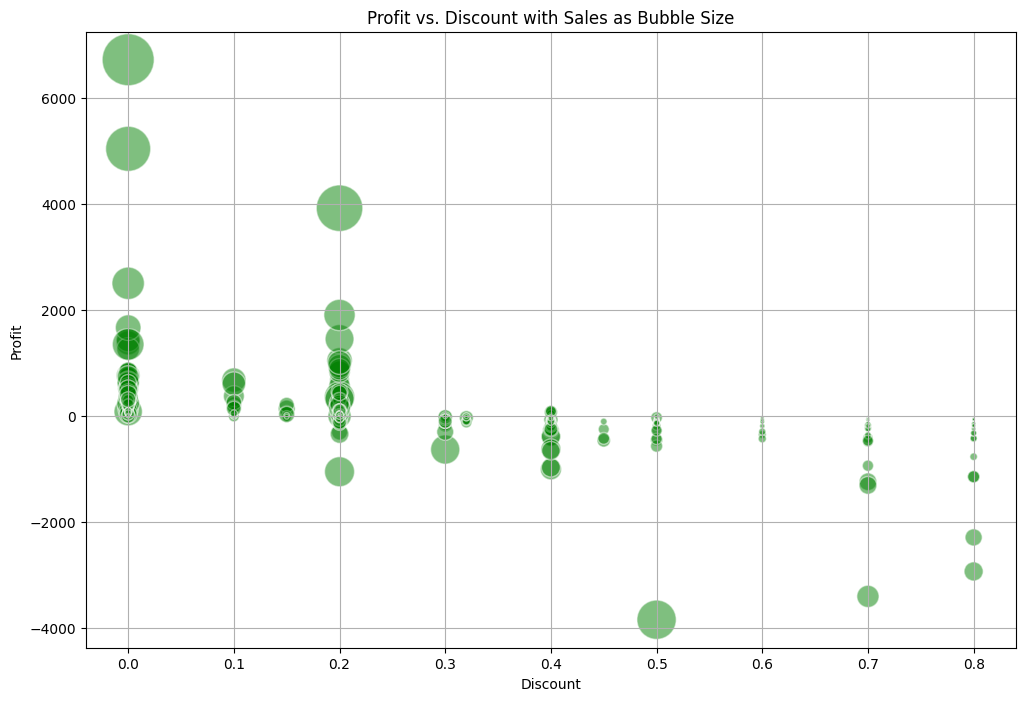

In [172]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Discount'], df['Profit'], s=df['Sales']*0.1, alpha=0.5, c='green', edgecolors='w')
plt.title('Profit vs. Discount with Sales as Bubble Size')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


**6.A Bubble Chart: Profit vs. Discount with Sales as Bubble Size**

**Questions Answered:**

1.)How do discounts influence Profit and Sales?

2.)Are there patterns in the relationship between discount levels and Profit?

**Observations:**

1.) This chart displays the relationship between Profit and discount levels, with bubble size representing Sales.It helps visualize how discounts affect Porfit and Sales.

2.) 20% discount is the optimum discount as the customer also gets discount and the Company also makes a good Profit and the Sales increases.

3.)We can see that at 70% and 80% discounts company faces loss and also the Sales increases. So to decrease this loss and make profit company needs to revise it discount schemes.


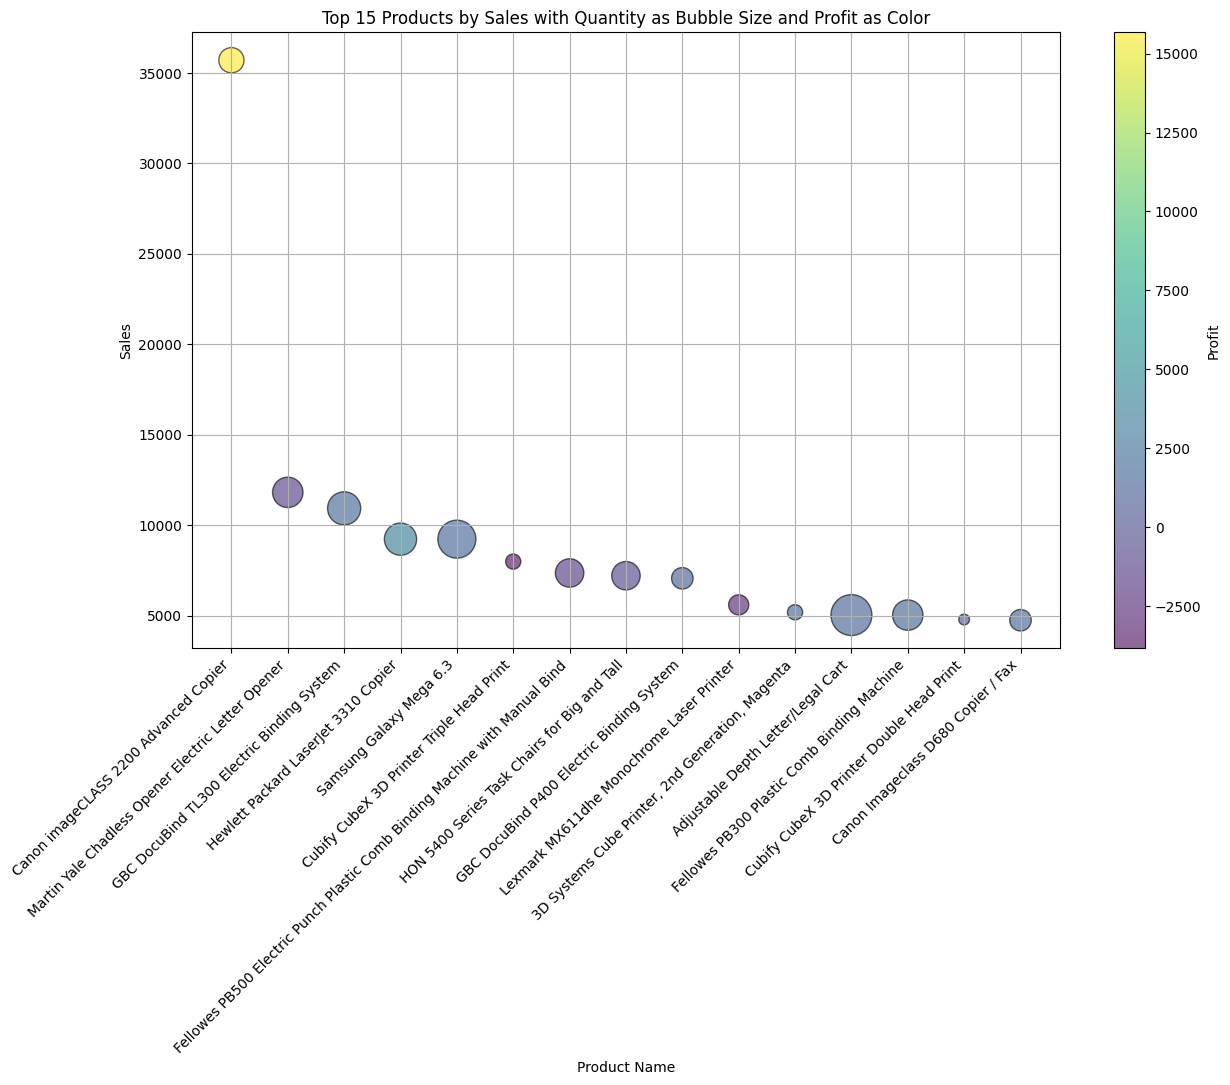

In [173]:
product_data = df.groupby(['Sub-Category', 'Product Name']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'
}).reset_index()

top_15_products = product_data.nlargest(15, 'Sales')

plt.figure(figsize=(14, 8))

bubble = plt.scatter(top_15_products['Product Name'], top_15_products['Sales'],
                     s=top_15_products['Quantity']*30, c=top_15_products['Profit'],
                     alpha=0.6, cmap='viridis', edgecolors='black')

plt.colorbar(bubble, label='Profit')

plt.title('Top 15 Products by Sales with Quantity as Bubble Size and Profit as Color')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()


**6.B Bubble Chart: Top 15 Products by Sales with Quantity as Bubble Size and Profit as Color**

**Questions Answered:**

1.)What are the top 15 products by sales, and how do they compare in terms of quantity and profit?

2.)How does profit vary among these top products?

**Observations:**

1.)This chart shows the top 15 products by sales, with bubble size representing quantity and color indicating profit.

2.)We can see Canon imageCLASS 2200 Advanced Copier has the highest Sales and it also gives a good profit.

3.)Cubify CubeX 3D Printer Triple Head Print has high loss and Cubify CubeX 3D Printer Double Head Print has low profit ,low sales and also its quantity sold are less so it would be wise for Company to remove this Products
